In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
appointments_modified = pd.read_csv('D:/DataIncubator_ChestXray/appointment_show_no-show/appointments_withFeatures.csv')

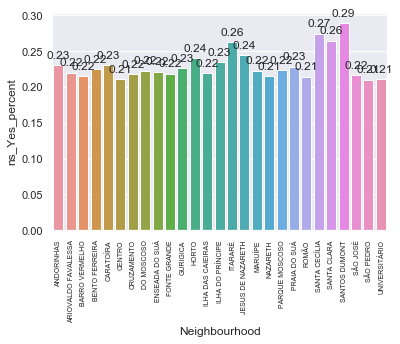

In [6]:
df = appointments_modified.groupby(['Neighbourhood', 'No-show']).size().reset_index()
df.columns = ['Neighbourhood', 'No-show', "count"]
k = pd.pivot_table(df, index='Neighbourhood', columns='No-show', values="count")
k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
k["Yes_greator_than_overall"] = (k["ns_Yes_percent"] > 0.21).apply(lambda x: "yes" if x == True else "no")
k_fileterd =  k[k["Yes_greator_than_overall"] == "yes"]

fontdict = {'fontsize': '7'}
sns.set()
g = sns.barplot(x=k_fileterd.index, y=k_fileterd.ns_Yes_percent)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

_, label = plt.xticks()
g.set_xticklabels(label, rotation=90, fontdict=fontdict)
plt.savefig('neighbourhood.jpg')

In [9]:
def barplot_sns(data, filename, order=None):
    g = sns.barplot(x=data.index, y = data.ns_Yes_percent, order=order)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    _, label = plt.xticks()
    g.set_xticklabels(label, rotation=45)
#     plt.show()
    plt.savefig(filename + '.jpg')

In [10]:
def percent_groupbyPlot(column, label, data, order=None):
    df = data.groupby([column, label]).size().reset_index()
    df.columns = [column, label, "count"]
    k = pd.pivot_table(df, index=column, columns=label, values="count")
    k["ns_No_percent"] = k["No"] / (k["No"] + k["Yes"])
    k["ns_Yes_percent"] = k["Yes"] / (k["No"] + k["Yes"])
    barplot_sns(k, column, order)

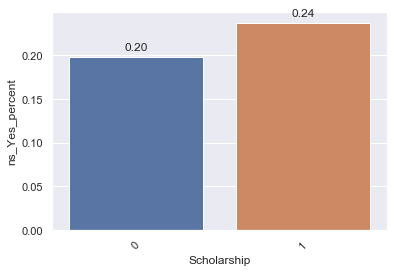

In [11]:
percent_groupbyPlot('Scholarship', 'No-show', appointments_modified)

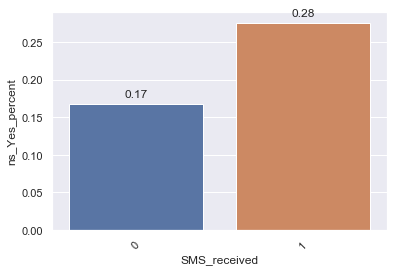

In [12]:
percent_groupbyPlot('SMS_received', 'No-show', appointments_modified)

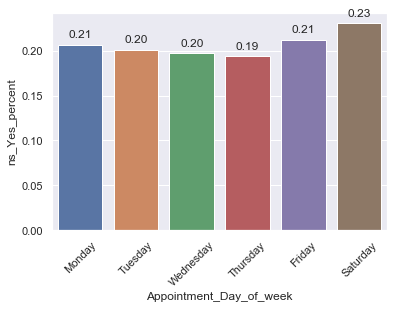

In [13]:
percent_groupbyPlot('Appointment_Day_of_week', 'No-show', appointments_modified, ["Monday", 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

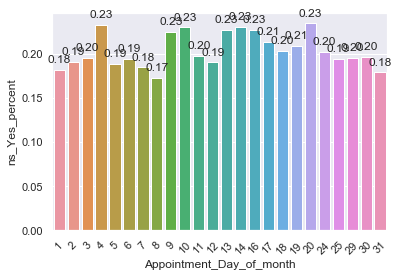

In [14]:
percent_groupbyPlot('Appointment_Day_of_month', 'No-show', appointments_modified)

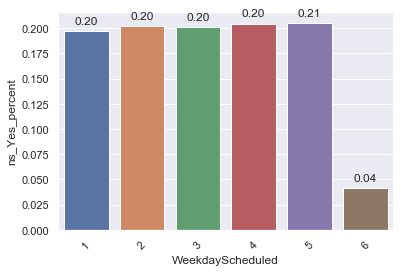

In [15]:
percent_groupbyPlot('WeekdayScheduled', 'No-show', appointments_modified)

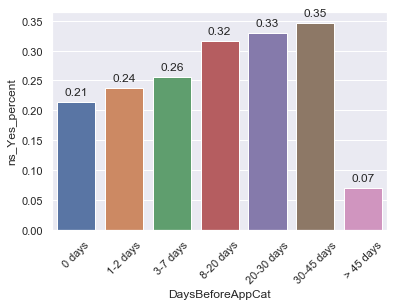

In [16]:
percent_groupbyPlot('DaysBeforeAppCat', 'No-show', appointments_modified, ['0 days', '1-2 days', '3-7 days', '8-20 days', '20-30 days', '30-45 days', '> 45 days'])

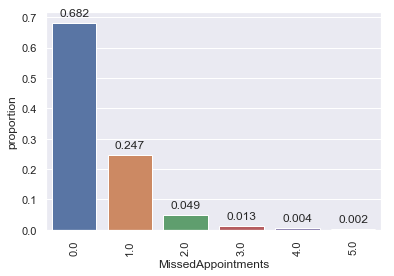

In [17]:
df = appointments_modified.groupby(['MissedAppointments']).size().reset_index()
df.columns = ['MissedAppointments',  "count"]
df["proportion"] = df['count'] / appointments_modified.shape[0]

g = sns.barplot(x='MissedAppointments',y='proportion', data=df[df['proportion'] > 0.001])
for p in g.patches:
    g.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

_, label = plt.xticks()
g.set_xticklabels(label, rotation=90)
#     plt.xlabel(c)
plt.savefig('MissedAppointments.jpg')